###### Finance companies deals with some kinds of home loans. They may have their presence across urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
###### Mostly Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, I have provided a data set to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. Try to automate this Loan Eligibility Process.

#### Dataset Description:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 



## Content of the Notebook.
* ### Data Visualization
* ### Data preprocessing
* ### model selection and building



In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Loan_Train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.drop('Loan_ID', 1,inplace=True)

C:\Users\ssraj\AppData\Local\Temp/ipykernel_4144/1780112738.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('Loan_ID', 1,inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
df.shape

(614, 12)

In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
#df.isnull().sum()

In [10]:
#loan_approval = df.fillna({'Gender': 'Not Known', 'Married':'Not Known', 'Dependents': -1, 'Self_Employed': 'Not Known', 'LoanAmount':999,'Loan_Amount_Term':999.0,'Credit_History':-1.0})

In [11]:
categorical_column=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area','Loan_Status']

In [12]:
for x in categorical_column:
    print(df[x].unique())

['Male' 'Female']
['Yes' 'No']
['1' '0' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
[360. 120. 180.  60. 300. 480. 240.  36.  84.]
['Rural' 'Urban' 'Semiurban']
['N' 'Y']


### Data Visualization

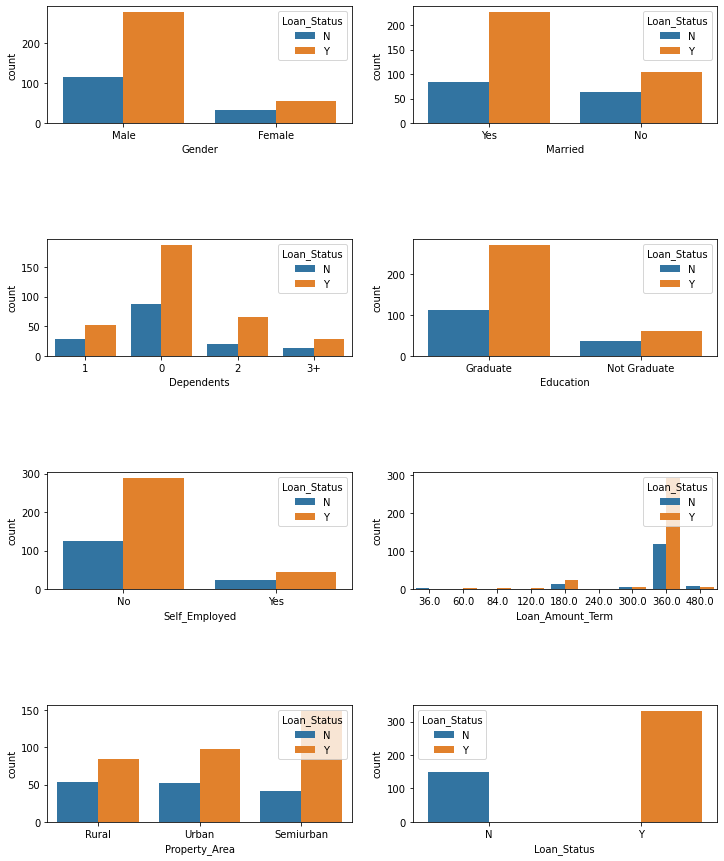

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_column):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

# Data Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [15]:
label_encoders = {}
for column in categorical_column:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [16]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,7,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,7,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,7,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,7,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,7,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,7,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,4,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,7,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,7,1.0,2,1


# Model selection and model building.

In [17]:
x=df.iloc[:,df.columns!='Loan_Status']
y=df.iloc[:,df.columns=='Loan_Status']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
182,1,1,0,0,0,4600,0.0,73.0,4,1.0,1
577,1,0,0,0,0,3229,2739.0,110.0,7,1.0,2
250,1,1,0,1,0,1668,3890.0,201.0,7,0.0,1
2,1,1,0,0,1,3000,0.0,66.0,7,1.0,2
61,1,1,3,0,0,3029,0.0,99.0,7,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,1875,1875.0,97.0,7,1.0,1
172,1,1,3,1,0,3522,0.0,81.0,4,1.0,0
552,1,1,1,0,0,3333,3250.0,158.0,7,1.0,2
438,1,0,0,0,1,10416,0.0,187.0,7,0.0,2


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6418464201828002
Validation Mean Accuracy:  0.716267942583732


<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

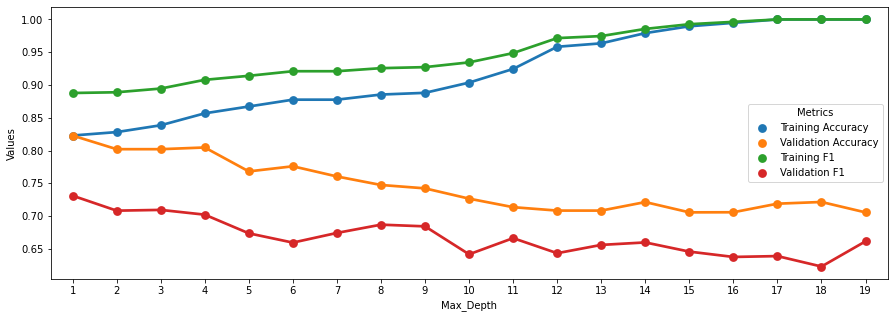

In [21]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [22]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)
model=tree_clf
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.8385416666666666
Training Data F1 Score  0.8945578231292517
Validation Mean F1 Score:  0.7094161395515796
Validation Mean Accuracy:  0.8020505809979495


In [23]:
import pickle

In [24]:
with open('LoanFinal.pickle','wb') as f:
    pickle.dump(model,f)
    f.close()

In [25]:
model = pickle.load(open('LoanFinal.pickle', 'rb'))

In [26]:
y_train.head(10)

,Loan_Status
372,1
257,0
558,1
474,1
472,1
155,1
563,1
118,0
331,1
356,1


In [27]:
#answer=np.array((1.668e+03, 3.890e+03, 2.010e+02, 3.600e+02, 0.000e+00, 1.000e+00,)).reshape(1,-1) 
answer=[[1,1,2,0,0,8333,3167.0,165.0,7,1.0,0]] #1
#answer=[[1,1,0,1,0,7660,0.0,104.0,7,0.0,2]] #0

In [28]:
print ("Predicts: " + str(model.predict(answer)))

Predicts: [1]


In [29]:
column_names=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']